In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout,Dense,ReLU,Softmax

In [2]:
train_path = r'D:\Express-U\data\live_dataset\train'
test_path = r'D:\Express-U\data\live_dataset\test' 

In [3]:
train_batches = ImageDataGenerator(preprocessing_function= tensorflow.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

Found 24535 images belonging to 35 classes.
Found 1435 images belonging to 35 classes.


In [4]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

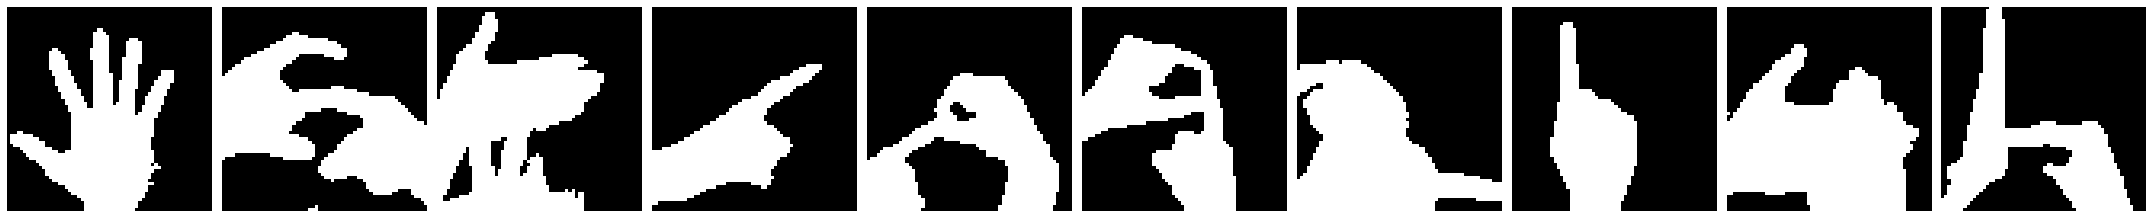

(10, 64, 64, 3)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(35,activation ="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [8]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto') 

In [9]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches) 

Epoch 1/10
2454/2454 [==============================] - 611s 249ms/step - loss: 0.2459 - accuracy: 0.9432 - val_loss: 0.0030 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 2/10
2454/2454 [==============================] - 104s 42ms/step - loss: 5.4536e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 3/10
2454/2454 [==============================] - 105s 43ms/step - loss: 3.9663e-04 - accuracy: 1.0000 - val_loss: 6.1660e-04 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 4/10
2454/2454 [==============================] - 106s 43ms/step - loss: 2.2493e-04 - accuracy: 1.0000 - val_loss: 5.0453e-04 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 5/10
2454/2454 [==============================] - 109s 45ms/step - loss: 1.8643e-04 - accuracy: 1.0000 - val_loss: 4.2744e-04 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 6/10
2454/2454 [==============================] - 111s 45ms/step - loss: 1.5881e-04 - accuracy: 1.0000 - val_loss: 3.7062e-04 - val_accuracy: 1.0000 - lr

In [12]:
imgs, labels = next(test_batches) 
model.evaluate(imgs, labels, verbose=0)


[0.0002751646679826081, 1.0]

In [11]:
model.save('model_second.h5')

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [9]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches) 

Epoch 1/10
2454/2454 [==============================] - 608s 247ms/step - loss: 0.3677 - accuracy: 0.9066 - val_loss: 0.0258 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 2/10
2454/2454 [==============================] - 116s 47ms/step - loss: 0.0511 - accuracy: 0.9888 - val_loss: 0.0048 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 3/10
2454/2454 [==============================] - 109s 45ms/step - loss: 0.0729 - accuracy: 0.9885 - val_loss: 3.3793e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
2454/2454 [==============================] - 93s 38ms/step - loss: 0.0604 - accuracy: 0.9931 - val_loss: 0.0136 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 5/10
2454/2454 [==============================] - 116s 47ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.6145e-05 - val_accuracy: 1.0000 - lr: 2.0000e-04
Epoch 6/10
2454/2454 [==============================] - 112s 46ms/step - loss: 1.0460e-05 - accuracy: 1.0000 - val_loss: 6.1086e-06 - val_accuracy: 1.0000 - lr: 2.0000e-04
Epoch 7/10
2454/

In [10]:
imgs, labels = next(test_batches) 
model.evaluate(imgs, labels, verbose=0)

[0.0, 1.0]

In [11]:
model.save('model_second_adam.h5')